In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/mushroom-classification/mushrooms.csv


In [2]:
# Read Mushroom Dataset
file = "/kaggle/input/mushroom-classification/mushrooms.csv"
df = pd.read_csv(file)
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
# Check for NA 
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [4]:
# check for available classes for classification
df['class'].unique()

array(['p', 'e'], dtype=object)

In [5]:
# Label encoder to convert the dataset
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


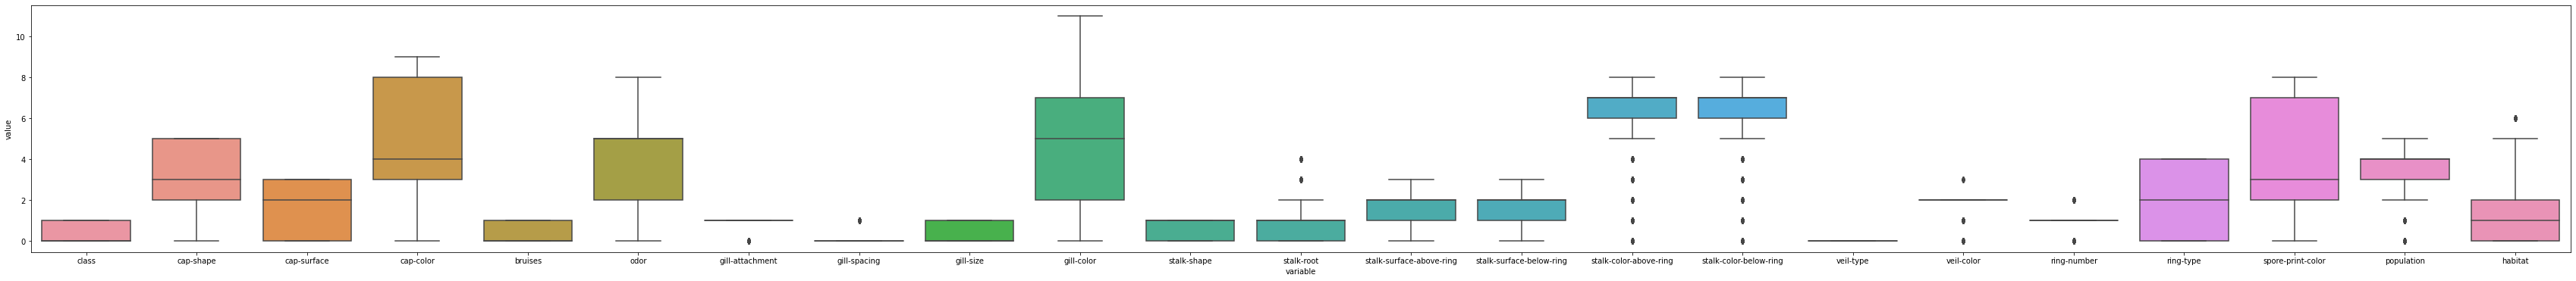

In [6]:
# Visualizing outliers if any
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(60, 6))
sns.boxplot(x="variable", y="value", data=pd.melt(df))

In [7]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


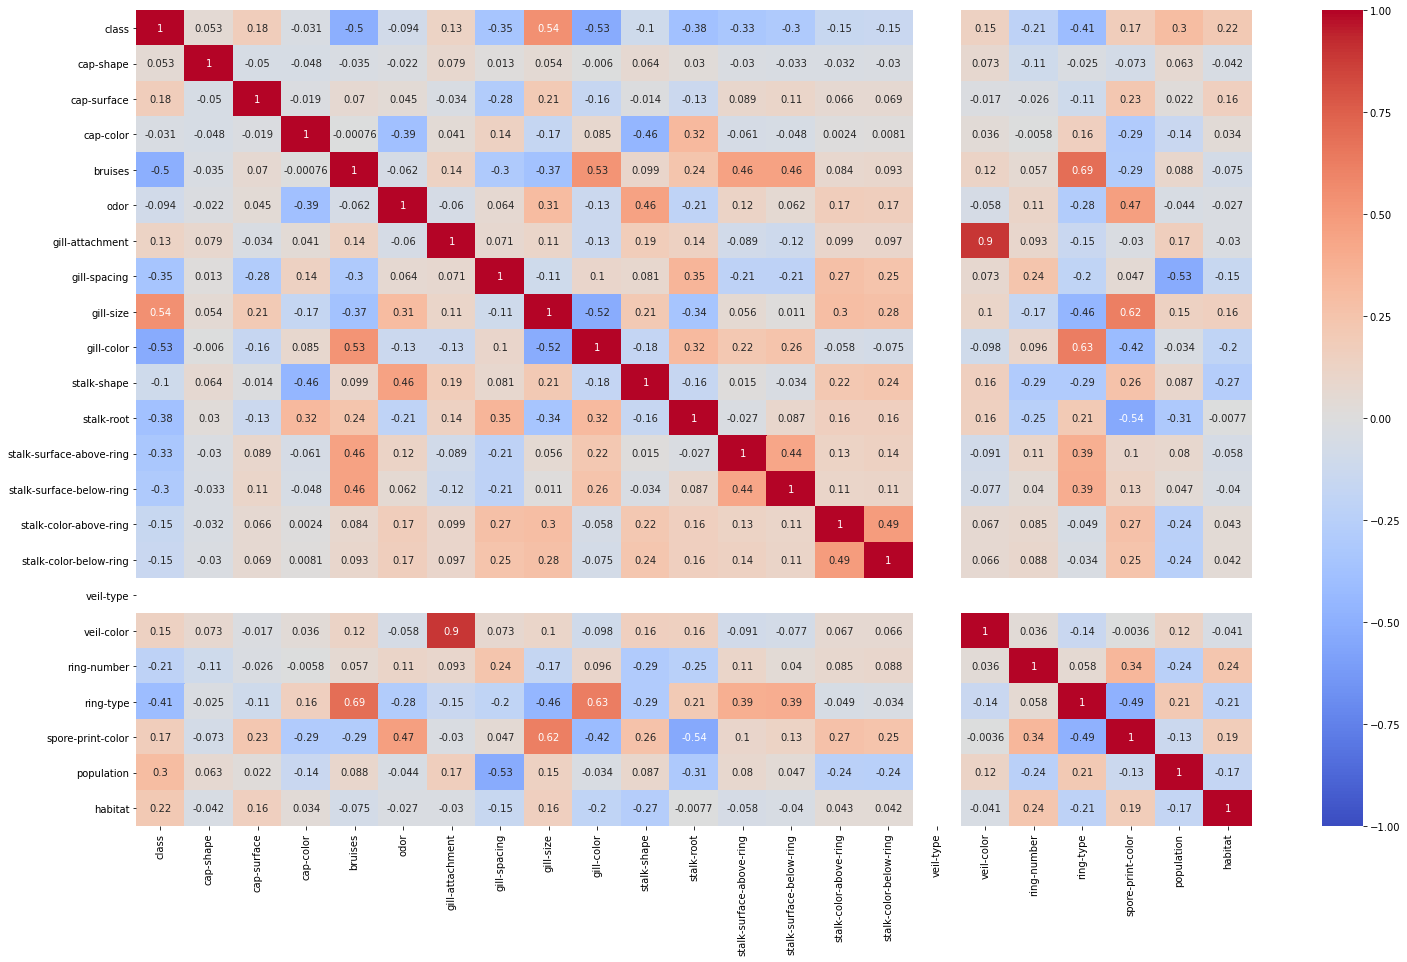

In [8]:
# Plotting correlation matrix which depicts that, there is good amount of correlation among the features.
plt.figure(figsize=(25, 15))
sns.heatmap(df.corr(),
            vmin=-1,
            cmap='coolwarm',
            annot=True);

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [10]:
# As our dataset has nominal values, we will be performing the one hot encoding operation and making it more sparse.
file = "/kaggle/input/mushroom-classification/mushrooms.csv"
df = pd.read_csv(file)
df_one_hot = pd.concat([df.iloc[:,0], pd.get_dummies(df.iloc[:,1:23])], axis=1)
features = df_one_hot.iloc[:,1:118]
label = df_one_hot.iloc[:,0] 
label = le.fit_transform(label)

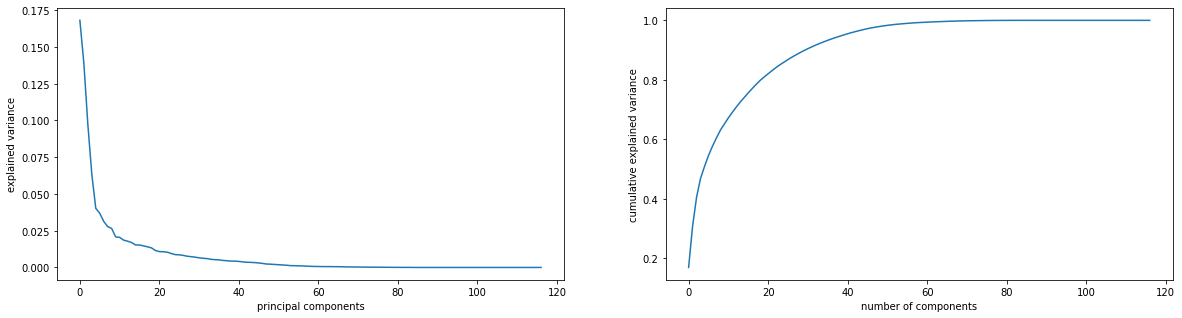

In [11]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=123) #instantiate.
pca.fit(features)
fig = plt.figure(figsize = (20,5))
ax = plt.subplot(121)
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('principal components')
plt.ylabel('explained variance')

ax2 = plt.subplot(122)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

plt.show()

In [12]:
# what percentage of variance in data can be explained by first 2,3 and 4 principal components respectively?
pca.explained_variance_ratio_[0:50].sum().round(3)

0.981

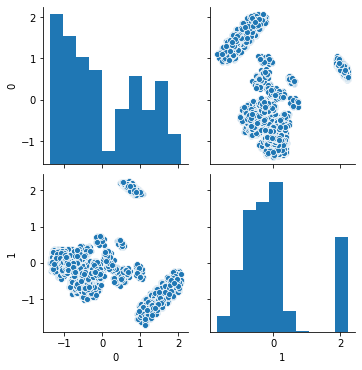

In [13]:
df_pca = pca.transform(features)# our data transformed with new features as principal components.
df_pca = df_pca[:, 0:2] # Since we require first two principal components only.
df_s = scaler.fit_transform(df_pca) # s in df_s stands for scaled.
sns.pairplot(pd.DataFrame(df_s))

In [14]:
# Checks the possibility in the dataset for clustering and values depicts that the dataset is indeed highly clusterable

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

hopkins(pd.DataFrame(df_s))

0.989886326781329

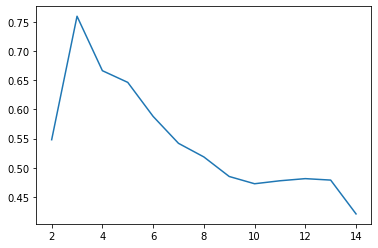

In [15]:
from sklearn.cluster import KMeans # import.

# silhouette scores to choose number of clusters.
from sklearn.metrics import silhouette_score
def sil_score(df):
    sse_ = []
    for k in range(2, 15):
        kmeans = KMeans(n_clusters=k, random_state=123).fit(df_s) # fit.
        sse_.append([k, silhouette_score(df, kmeans.labels_)])
    plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1])

sil_score(df_s)

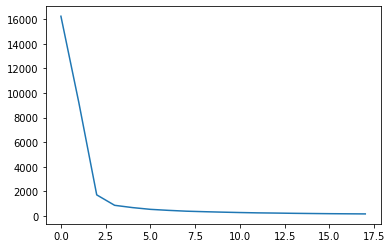

In [16]:
# Elbow method to find possible clusters.
def plot_ssd(df):
    ssd = []
    for num_clusters in list(range(1,19)):
        model_clus = KMeans(n_clusters = num_clusters, max_iter=50, random_state=123)
        model_clus.fit(df)
        ssd.append(model_clus.inertia_)
    plt.plot(ssd)

plot_ssd(df_s)

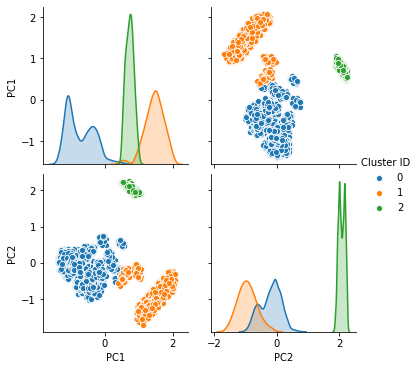

In [17]:
# K-means with K=3.
km2c = KMeans(n_clusters=3, max_iter=50, random_state=93)
km2c.fit(df_s)
df_dummy = pd.DataFrame.copy(df)
dfkm2c = pd.concat([df_dummy, pd.Series(km2c.labels_)], axis=1)
dfkm2c.rename(columns={0:'Cluster ID'}, inplace=True)
df_dummy = pd.DataFrame.copy(pd.DataFrame(df_s))
dfpcakm2c = pd.concat([df_dummy, pd.Series(km2c.labels_)], axis=1)
dfpcakm2c.columns = ['PC1', 'PC2', 'Cluster ID']
sns.pairplot(data=dfpcakm2c, vars=['PC1', 'PC2'], hue='Cluster ID')

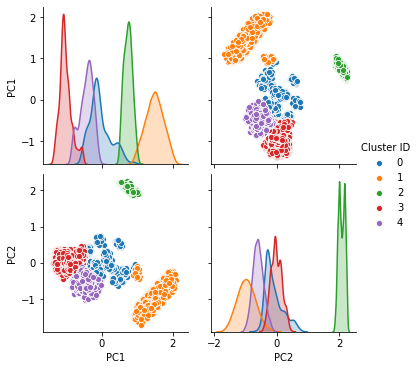

In [18]:
# K-means with K=5.
km2c = KMeans(n_clusters=5, max_iter=50, random_state=93)
km2c.fit(df_s)
df_dummy = pd.DataFrame.copy(df)
dfkm2c = pd.concat([df_dummy, pd.Series(km2c.labels_)], axis=1)
dfkm2c.rename(columns={0:'Cluster ID'}, inplace=True)
df_dummy = pd.DataFrame.copy(pd.DataFrame(df_s))
dfpcakm2c = pd.concat([df_dummy, pd.Series(km2c.labels_)], axis=1)
dfpcakm2c.columns = ['PC1', 'PC2', 'Cluster ID']
sns.pairplot(data=dfpcakm2c, vars=['PC1', 'PC2'], hue='Cluster ID')

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features,label,test_size=0.2,random_state=4)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier
import xgboost
from sklearn import svm, tree
from sklearn import metrics

classifiers = []
nb_model = GaussianNB()
classifiers.append(("Gausian Naive Bayes Classifier",nb_model))
lr_model= LogisticRegression()
classifiers.append(("Logistic Regression Classifier",lr_model))
# sv_model = svm.SVC()
# classifiers.append(sv_model)
dt_model = tree.DecisionTreeClassifier()
classifiers.append(("Decision Tree Classifier",dt_model))
rf_model = RandomForestClassifier()
classifiers.append(("Random Forest Classifier",rf_model))
xgb_model = xgboost.XGBClassifier()
classifiers.append(("XG Boost Classifier",xgb_model))
lda_model = LinearDiscriminantAnalysis()
classifiers.append(("Linear Discriminant Analysis", lda_model))
gp_model =  GaussianProcessClassifier()
classifiers.append(("Gaussian Process Classifier", gp_model))
ab_model =  AdaBoostClassifier()
classifiers.append(("AdaBoost Classifier", ab_model))

In [21]:
cv_scores = []
names = []
for name, clf in classifiers:
    print(name)
    clf.fit(X_train, y_train)
    y_prob = clf.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
    y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
    print("Model Score : ",clf.score(X_test, y_pred))
    print("Number of mislabeled points from %d points : %d"% (X_test.shape[0],(y_test!= y_pred).sum()))
    scores = cross_val_score(clf, features, label, cv=10, scoring='accuracy')
    cv_scores.append(scores)
    names.append(name)
    print("Cross validation scores : ",scores.mean())
    confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
    print("Confusion Matrix \n",confusion_matrix)
    classification_report = metrics.classification_report(y_test,y_pred)
    print("Classification Report \n",classification_report)

Gausian Naive Bayes Classifier
Model Score :  1.0
Number of mislabeled points from 1625 points : 57
Cross validation scores :  0.9147033428462363
Confusion Matrix 
 [[788  57]
 [  0 780]]
Classification Report 
               precision    recall  f1-score   support

           0       1.00      0.93      0.97       845
           1       0.93      1.00      0.96       780

    accuracy                           0.96      1625
   macro avg       0.97      0.97      0.96      1625
weighted avg       0.97      0.96      0.96      1625

Logistic Regression Classifier
Model Score :  1.0
Number of mislabeled points from 1625 points : 0
Cross validation scores :  0.9677588327607414
Confusion Matrix 
 [[845   0]
 [  0 780]]
Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       845
           1       1.00      1.00      1.00       780

    accuracy                           1.00      1625
   macro avg       1.00      1.0

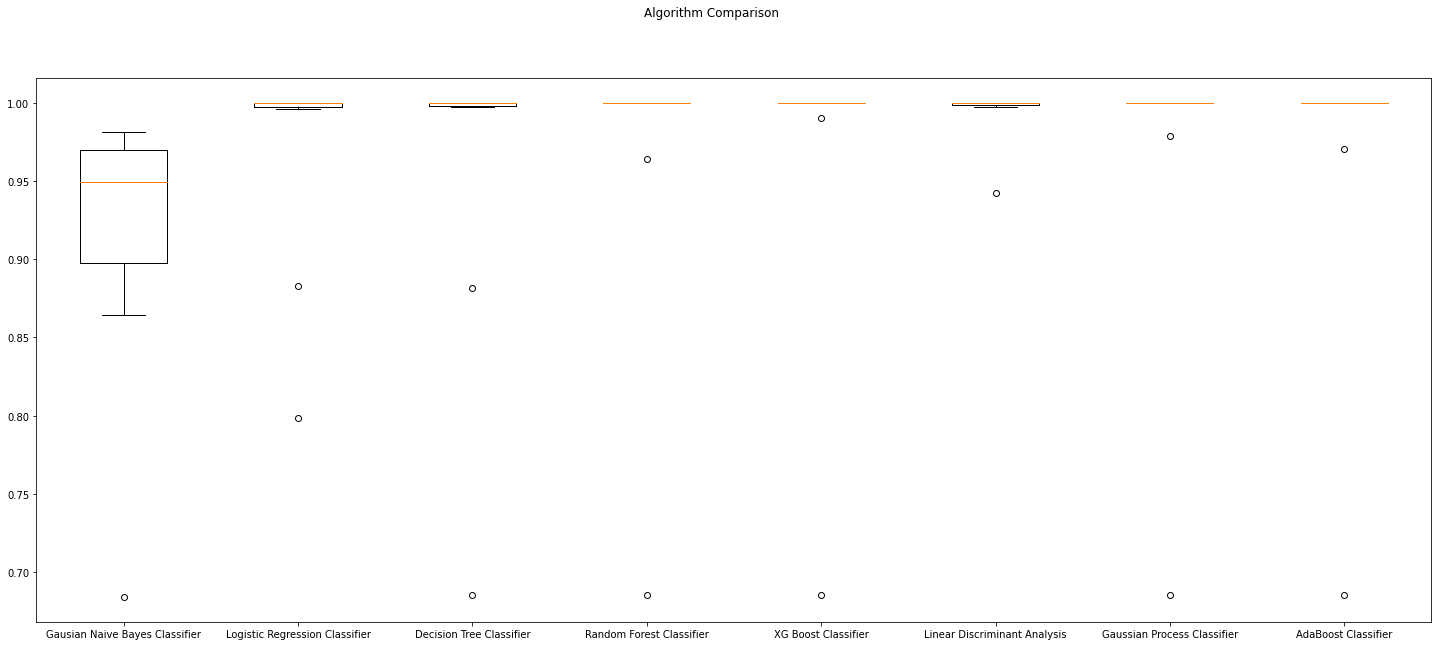

In [22]:
#Model Comparison
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(25, 10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(cv_scores)
ax.set_xticklabels(names)
plt.show()